In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import squarify
import matplotlib.ticker as ticker

In [14]:
df = pd.read_csv('abc_xyz_dataset.csv')

In [15]:
df.head()

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


In [16]:
df.shape

(1000, 18)

In [17]:
df.isnull().sum()

Item_ID               0
Item_Name             0
Category              0
Jan_Demand            0
Feb_Demand            0
Mar_Demand            0
Apr_Demand            0
May_Demand            0
Jun_Demand            0
Jul_Demand            0
Aug_Demand            0
Sep_Demand            0
Oct_Demand            0
Nov_Demand            0
Dec_Demand            0
Total_Annual_Units    0
Price_Per_Unit        0
Total_Sales_Value     0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

## Top Categories by Total Sales Value

         Category  Total_Sales_Value
0         Grocery          911737236
1         Apparel           99381360
2     Electronics           25081150
3            Toys           21945148
4  Home & Kitchen           14143006


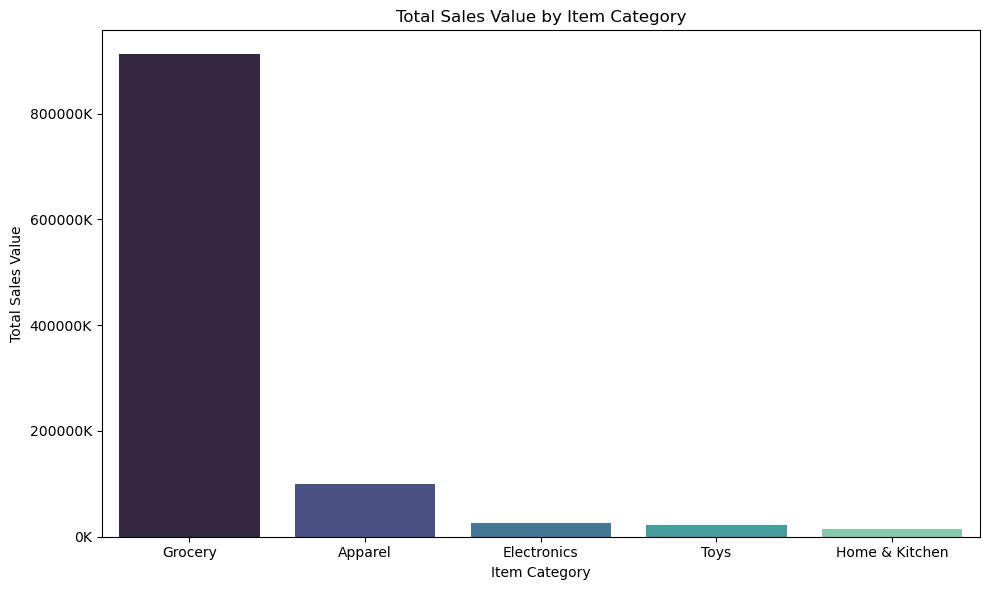

In [20]:
top_categories = df.groupby('Category')['Total_Sales_Value'].sum().sort_values(ascending=False).reset_index()
print(top_categories)

import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6))

# Define a function for formatting the y-axis
def format_y_axis(ax, unit, divisor):
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/divisor:.0f}{unit}'))

# Create the barplot
ax = sns.barplot(data=top_categories,x='Category', y='Total_Sales_Value', palette='mako')


# Apply the formatting function to the y-axis
format_y_axis(ax, 'K', 1000)  # Format to thousands (e.g., 1500 becomes 1K)
# format_y_axis(ax, 'M', 1000000) #If you want to format to millions

plt.title('Total Sales Value by Item Category')
plt.xlabel('Item Category')
plt.ylabel('Total Sales Value')

plt.tight_layout()
plt.show()

## Average Monthly Demand Trend

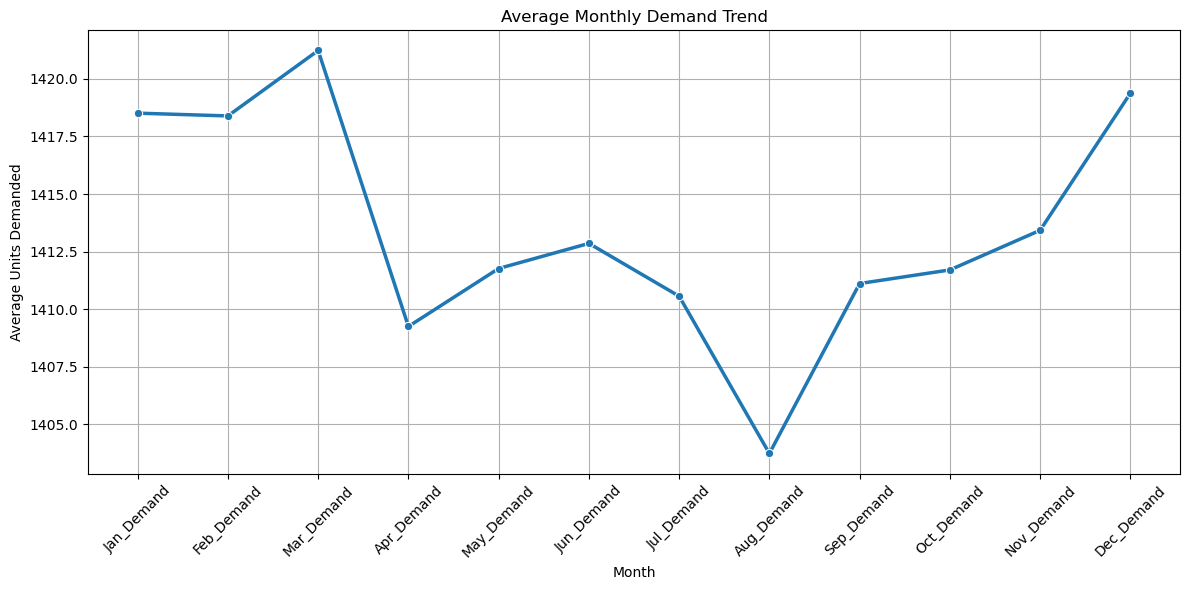

In [21]:
monthly_demand_cols = ['Jan_Demand', 'Feb_Demand', 'Mar_Demand', 'Apr_Demand',
                       'May_Demand', 'Jun_Demand', 'Jul_Demand', 'Aug_Demand',
                       'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand']

monthly_avg = df[monthly_demand_cols].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', linewidth=2.5)
plt.title('Average Monthly Demand Trend')
plt.xlabel('Month')
plt.ylabel('Average Units Demanded')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation Between Price, Demand & Sales

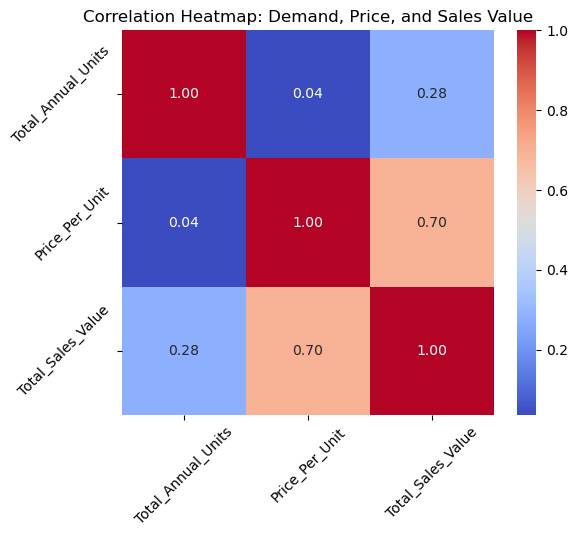

In [22]:
corr_cols = ['Total_Annual_Units', 'Price_Per_Unit', 'Total_Sales_Value']
corr = df[corr_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Demand, Price, and Sales Value')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Price Distribution by Category

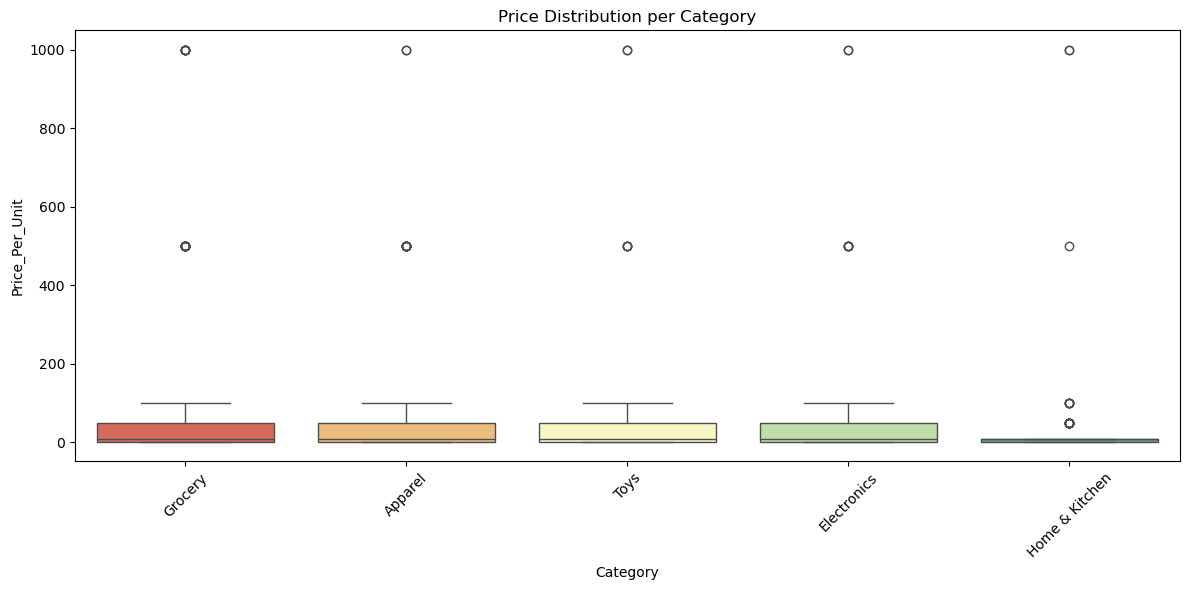

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Price_Per_Unit', palette='Spectral')
plt.title('Price Distribution per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Category Share in Total Sales Value

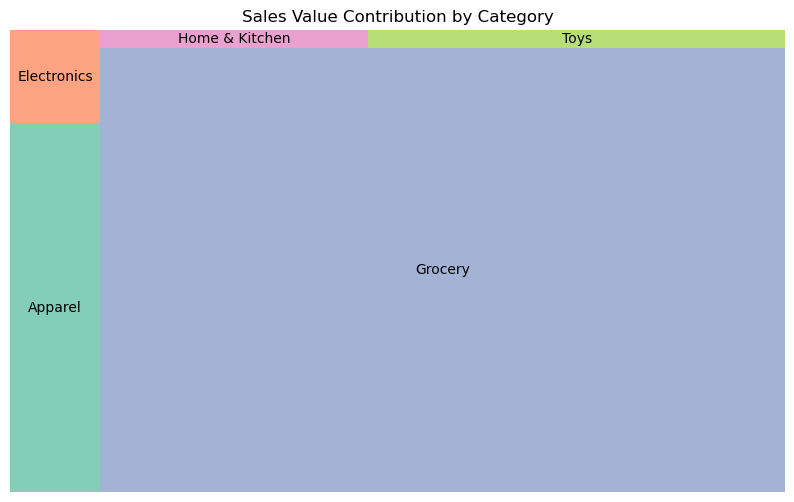

In [24]:
import squarify

sales_by_category = df.groupby('Category')['Total_Sales_Value'].sum().reset_index()

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sales_by_category['Total_Sales_Value'], 
              label=sales_by_category['Category'], 
              alpha=0.8, 
              color=sns.color_palette('Set2'))
plt.title('Sales Value Contribution by Category')
plt.axis('off')
plt.show()

## Price vs. Total Units

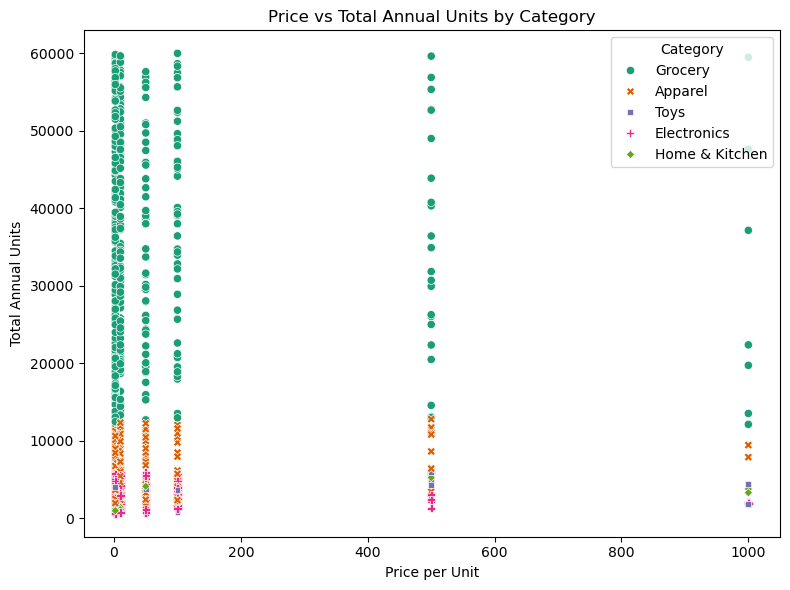

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price_Per_Unit', y='Total_Annual_Units', hue='Category', style='Category', palette='Dark2')
plt.title('Price vs Total Annual Units by Category')
plt.xlabel('Price per Unit')
plt.ylabel('Total Annual Units')
plt.tight_layout()
plt.show()